## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [17]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
SAVE_BEST=[True, False]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for save in SAVE_BEST:
    keras.backend.clear_session()
    print('save best only:%s'%(save))
    
    model_ckpt = ModelCheckpoint(filepath='./tmp.h5', monitor='val_loss', save_best_only=SAVE_BEST,
                                 save_weights_only=True)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test, y_test),
             shuffle=True,
             callbacks=[model_ckpt])
    
    # collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = ('save best only:%s'%(save))
    results[name_tag]={'train-loss': train_loss, 'val-loss':valid_loss, 'train-acc':train_acc, 'valid-acc':valid_acc}

save best only:True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128

Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5718 - accuracy: 0.8308 - val_loss: 1.6381 - val_accuracy: 0.4834
Epoch 47/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.5513 - accuracy: 0.8393 - val_loss: 1.6534 - val_accuracy: 0.4859
Epoch 48/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.5383 - accuracy: 0.8448 - val_loss: 1.6818 - val_accuracy: 0.4878
Epoch 49/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.5196 - accuracy: 0.8518 - val_loss: 1.6938 - val_accuracy: 0.4835
Epoch 50/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.5016 - accuracy: 0.8581 - val_loss: 1.7114 - val_accuracy: 0.4787
save best only:False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________

Epoch 41/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.6559 - accuracy: 0.7960 - val_loss: 1.5530 - val_accuracy: 0.4932
Epoch 42/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.6382 - accuracy: 0.8024 - val_loss: 1.5470 - val_accuracy: 0.4928
Epoch 43/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6196 - accuracy: 0.8084 - val_loss: 1.5661 - val_accuracy: 0.4965
Epoch 44/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6023 - accuracy: 0.8157 - val_loss: 1.5790 - val_accuracy: 0.4891
Epoch 45/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.5855 - accuracy: 0.8227 - val_loss: 1.5766 - val_accuracy: 0.4980
Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5679 - accuracy: 0.8311 - val_loss: 1.5843 - val_accuracy: 0.4912
Epoch 47/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.5510 - accuracy:

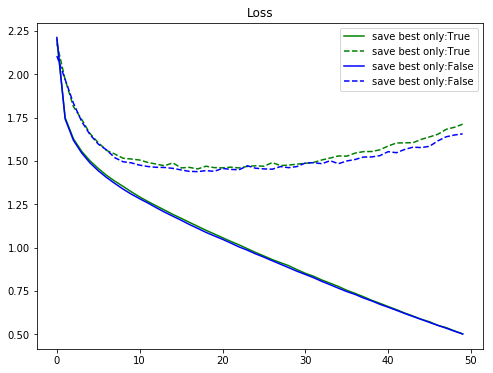

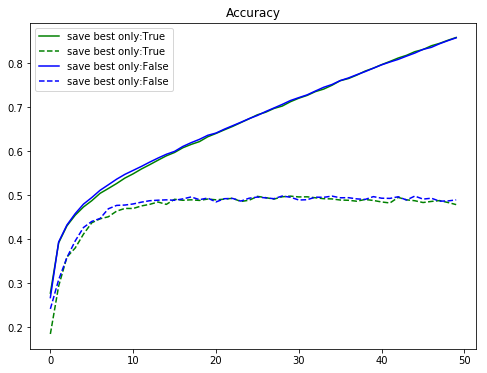

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['g', 'b', 'y', 'm', 'k','gray','purple','orange','brown','pink','olive','cyan','gray']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [22]:
# rebuild model as model2
# simulating starting a new script
model2 = build_mlp(input_shape=x_train.shape[1:])
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# check that the new model does indeed have random weights
print (model2.evaluate(x=x_test, y=y_test))

# load 3rd epoch weights
model2.load_weights('./tmp.h5')

# these should be equal...
print (model2.evaluate(x=x_test, y=y_test))
print (model.evaluate(x=x_test, y=y_test))

10000/10000 [==============================] - 2s 243us/step
[2.373649029159546, 0.10000000149011612]
10000/10000 [==============================] - 2s 227us/step
[1.437927202796936, 0.4961000084877014]
10000/10000 [==============================] - 2s 217us/step
[1.6557367650985717, 0.4893999993801117]
